In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [5]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw0/LOGS/')
fig_dir =  Path('./../mesa-r22.05.1/star/ay204_hw0/postprocessing/figures/')

In [6]:
history = pd.read_csv(data_dir / '1M_copy.data', sep='\s+', header=2)

<ipython-input-8-8d352817dc8a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000]) / 1000)


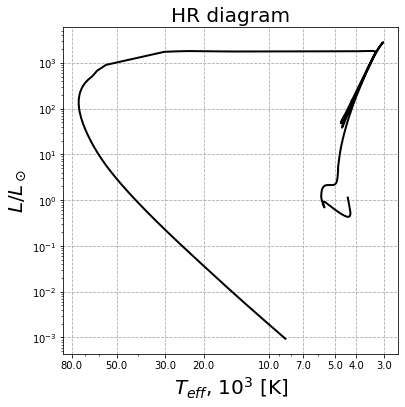

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('HR diagram', fontsize=20)
ax.plot(np.power(10, history['log_Teff']), np.power(10, history['log_L']), lw=2, c='black' )
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticklabels(np.array([3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000]) / 1000)
ax.set_xticks(     [3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000])

ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
plt.savefig(fig_dir / 'HR.png', dpi=300)

<ipython-input-9-394bee50cb97>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000]) / 1000)


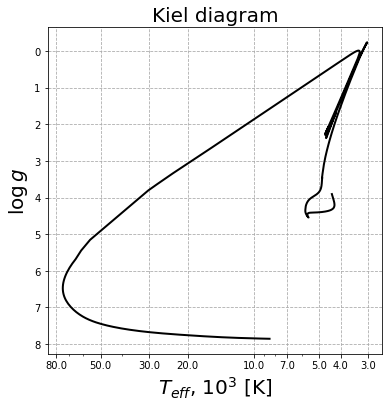

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Kiel diagram', fontsize=20)
ax.plot(np.power(10, history['log_Teff']), history['log_g'], lw=2, c='black' )
ax.grid(c='#aaaaaa', ls='--')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticklabels(np.array([3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000]) / 1000)
ax.set_xticks(     [3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000])

ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel(r"$\log g$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
plt.savefig(fig_dir / 'Kiel.png', dpi=300)

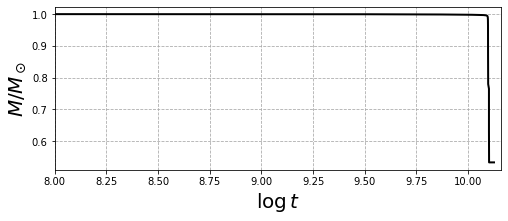

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))
# plt.title('Kiel diagram', fontsize=20)
ax.plot(np.log10(history['star_age'][200:]), history['star_mass'][200:], lw=2, c='black' )
ax.grid(c='#aaaaaa', ls='--')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xticklabels(np.array([3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000]) / 1000)
# ax.set_xticks(     [3000, 4000, 5000, 7000, 10000, 20000, 30000,50000, 80000])

ax.set_xlim(8,10.16)
# ax.invert_xaxis()
plt.ylabel(r"$M / M_\odot$", size=20)
plt.xlabel(r"$\log t$", size=20)
plt.savefig(fig_dir / 'm-t.png', dpi=300, bbox_inches='tight')

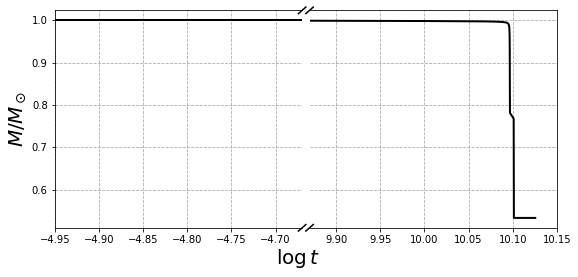

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(9,4), sharey=True)
# plt.title('Kiel diagram', fontsize=20)
plt.subplots_adjust(wspace=0.03)
for i in range(2):
    ax[i].plot(np.log10(history['star_age']), history['star_mass'], lw=2, c='black' )
    ax[i].grid(c='#aaaaaa', ls='--')
ax[0].set_xlim(-4.95,-4.67)
ax[1].set_xlim(9.87,10.15)
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_tick_params(left=False)
ax[0].tick_params(labelright=False)  # don't put tick labels at the top


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((1-d, 1+d), (-d, +d), **kwargs)        # bottom-left diagonal
ax[0].plot((1- d, 1+ d), (1-d, 1+d), **kwargs)  # top-left diagonal

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((- d, + d), (-d, +d), **kwargs)  # bottom-right diagonal
ax[1].plot(( - d,  + d), (1 - d, 1 + d), **kwargs)  # top-right diagonal


ax[0].set_ylabel(r"$M / M_\odot$", size=20)
# plt.xlabel(r"$\log t$", size=20)

fig.text(0.5, 0, r"$\log t$", size=20, ha='center')
plt.savefig(fig_dir / 'm-t.png', dpi=300, bbox_inches='tight')

In [12]:
t_MS      = 1
t_RGB     = 1000
t_He_burn = 12000

In [13]:
profiles = pd.read_csv(data_dir / 'profiles.index', sep='\s+', skiprows=1, names=['number', 'priority', 'profile'])

In [14]:
profiles[profiles['profile'] ==24]

,number,priority,profile
85,12000,2,24


In [15]:
profile1  = pd.read_csv(data_dir / 'profile3.5.data', sep='\s+', header=4)
profile11 = pd.read_csv(data_dir / 'profile11.data', sep='\s+', header=4)
profile24 = pd.read_csv(data_dir / 'profile24.data', sep='\s+', header=4)

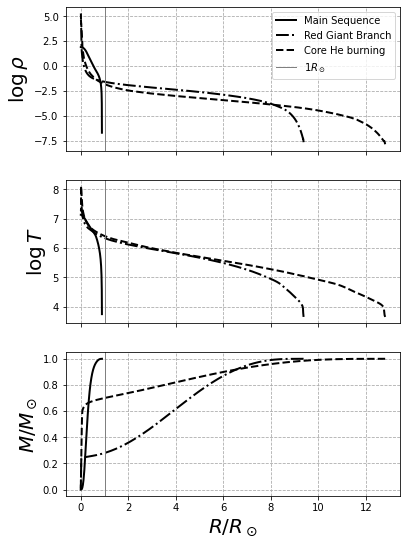

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(6,9), sharex=True)

# plt.title('Kiel diagram', fontsize=20)
ax[0].plot(np.power(10, profile1['logR']), profile1['logRho'], lw=2, c='black', label='Main Sequence')
ax[0].plot(np.power(10, profile11['logR']), profile11['logRho'], lw=2, c='black', ls='-.', label='Red Giant Branch')
ax[0].plot(np.power(10, profile24['logR']), profile24['logRho'], lw=2, c='black', ls='--', label='Core He burning')
ax[0].set_ylabel(r'$\log \rho$', size=20)

ax[1].plot(np.power(10, profile1['logR']), profile1['logT'], lw=2, c='black', label='Main Sequence')
ax[1].plot(np.power(10, profile11['logR']), profile11['logT'], lw=2, c='black', ls='-.', label='Red Giant Branch')
ax[1].plot(np.power(10, profile24['logR']), profile24['logT'], lw=2, c='black', ls='--', label='Core He burning')
ax[1].set_ylabel(r'$\log T$', size=20)

ax[2].plot(np.power(10, profile1['logR']), profile1['mass']   / profile1['mass'][0], lw=2, c='black', label='Main Sequence')
ax[2].plot(np.power(10, profile11['logR']), profile11['mass'] / profile11['mass'][0], lw=2, c='black', ls='-.', label='Red Giant Branch')
ax[2].plot(np.power(10, profile24['logR']), profile24['mass'] / profile24['mass'][0], lw=2, c='black', ls='--', label='Core He burning')
ax[2].set_ylabel(r'$M / M_\odot$', size=20)

for i in range(3):
    ax[i].grid(c='#aaaaaa', ls='--')
    ax[i].axvline(1, lw=1, c='gray', label=r'$1 R_\odot$')
ax[0].legend()
    
# plt.ylabel(r"$M / M_\odot$", size=20)
plt.subplots_adjust(wspace=1)
plt.xlabel(r"$R / R_\odot$", size=20)
plt.savefig(fig_dir / 'dif_stages_over_radius.png', dpi=300)

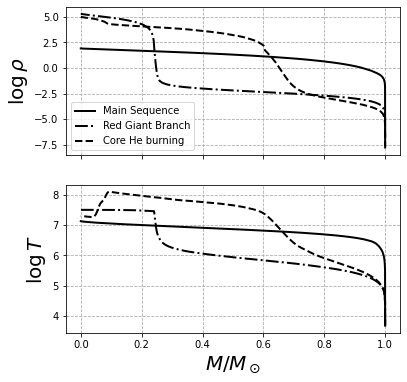

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)

# plt.title('Kiel diagram', fontsize=20)
ax[0].plot(profile1['mass']  / profile1['mass'][0],  profile1['logRho'] , lw=2, c='black', label='Main Sequence')
ax[0].plot(profile11['mass'] / profile11['mass'][0], profile11['logRho'], lw=2, c='black', ls='-.', label='Red Giant Branch')
ax[0].plot(profile24['mass'] / profile24['mass'][0], profile24['logRho'], lw=2, c='black', ls='--', label='Core He burning')
ax[0].set_ylabel(r'$\log \rho$', size=20)

ax[1].plot(profile1['mass']   / profile1['mass'][0], profile1['logT'] , lw=2, c='black', label='Main Sequence')
ax[1].plot(profile11['mass'] / profile11['mass'][0], profile11['logT'], lw=2, c='black', ls='-.', label='Red Giant Branch')
ax[1].plot(profile24['mass'] / profile24['mass'][0], profile24['logT'], lw=2, c='black', ls='--', label='Core He burning')
ax[1].set_ylabel(r'$\log T$', size=20)

for i in range(2):
    ax[i].grid(c='#aaaaaa', ls='--')
ax[0].legend()
    
# plt.ylabel(r"$M / M_\odot$", size=20)
plt.subplots_adjust(wspace=1)
plt.xlabel(r"$M / M_\odot$", size=20)
plt.savefig(fig_dir / 'dif_stages_over_mass.png', dpi=300)